### Exercise 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n_runs   = 10000    # trials
n_fisher = 1000     # fishermen 
n_sample = 10       # fishes 
mu       = 0.5      # probability of catching red fish

In [3]:
def sample(n_fisher, n_sample, mu):
    '''Return caught fishes of each fisherman as matrix X. The i-th row of matrix X consists of the fishes caught by the i-th fisherman. 

    Parameters:
        n_fisher    number of fishermen
        n_sample    number of fishes caught by each fisherman
        mu          probability of catching red fish

    Return
        X           n_fisher x n_sample fish matrix
    '''
    X = np.random.choice([0, 1], size=(n_fisher, n_sample), p=[1-mu, mu])
    return X

def run(n_runs, n_fisher, n_sample, mu):
    '''Return estimated mean of catching a read fish for each of the three fishermen f_1, f_r, f_* over all n_runs trials.

    Parameters:
        n_runs      number of trials
        n_fisher    number of fishermen
        n_sample    number of fishes caught by each fisherman
        mu          probability of catching red fish

    Return
        mu_n        sample means of the three fishermen over all trials.
    '''
    mu_n = np.zeros((3, n_runs))
    for t in range(n_runs):
        X = sample(n_fisher, n_sample, mu)
        X = X.mean(axis=1)
        mu_n[0,t] = X[0]
        mu_n[1,t] = X[np.random.randint(0, n_fisher)]
        mu_n[2,t] = X.min()
    return mu_n

In [4]:
mu_n = run(n_runs, n_fisher, n_sample, mu)
eps = np.arange(0.01, 0.9, 0.02)
hoeffding = 2*np.exp(-2*n_sample*eps**2)
union_bd = n_fisher * hoeffding
P = np.zeros((3, len(eps)))
for j, e in enumerate(eps):
    for i in range(3):
        d = np.abs(mu_n[i,:] - mu)
        P[i,j] = np.mean(d > e)

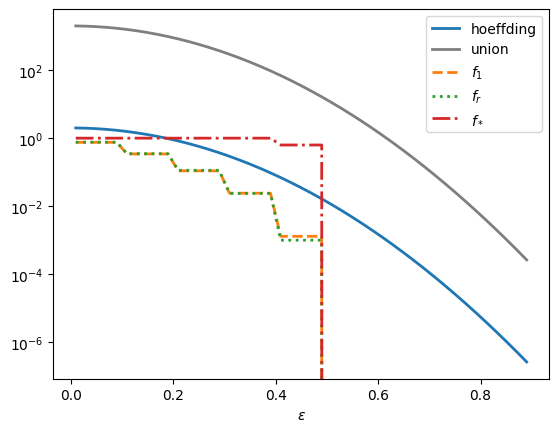

In [5]:
plt.semilogy(eps, hoeffding, lw=2, label='hoeffding')
plt.semilogy(eps, union_bd, lw=2, c='tab:gray', label='union')
plt.semilogy(eps, P[0], '--', lw=2, label='$f_1$')
plt.semilogy(eps, P[1], ':', lw=2, label='$f_r$')
plt.semilogy(eps, P[2], '-.', lw=2, label='$f_*$')
plt.xlabel(r'$\varepsilon$')
plt.legend()
plt.show()